In [1]:


# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image



ModuleNotFoundError: No module named 'matplotlib'

In [2]:
# Now as we have to predict the 10 different diseases from given pictures in cancer_images dataset
#print all the diseases folders and save as list 
diseases = os.listdir('C:\\Users\\lenovo\\Downloads\\cancer images')
print(diseases)
len(diseases)


['breast_benign', 'breast_malignant', 'breast_normal', 'lung_benign', 'lung_malignant', 'lung_normal', 'skin_benign', 'skin_malignant', 'tumer_brain_benign', 'tumer_brain_malignant']


10

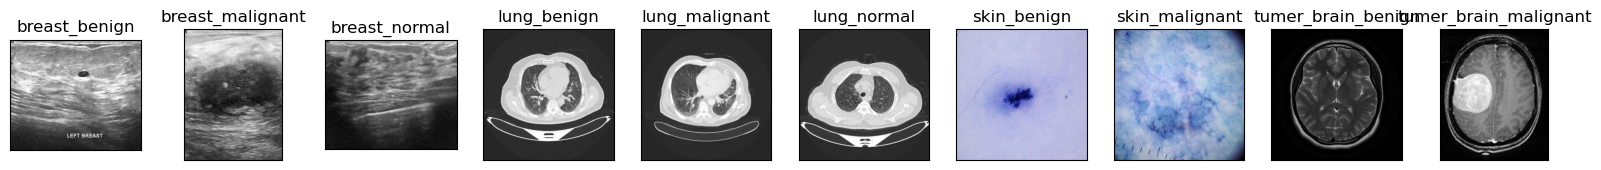

In [3]:
#Now print all the diseases with labels and its pictures in one image
plt.figure(figsize=(20, 20))
for i, disease in enumerate(diseases):
    for j in range(1):
        img = cv2.imread('C:\\Users\\lenovo\\Downloads\\cancer images/'+disease+'/'+os.listdir('C:\\Users\\lenovo\\Downloads\\cancer images/'+disease)[j])
        plt.subplot(10, 10, i+1)
        plt.imshow(img)
        plt.title(disease)
        plt.xticks([])
        plt.yticks([])

In [4]:
# As we have to predict the diseases using CNN 
# Now we will create the training and testing dataset
# We will create the training and testing dataset
X = []
y = []
for i, disease in enumerate(diseases):
    for img in os.listdir('C:\\Users\\lenovo\\Downloads\\cancer images/'+disease):
        img = cv2.imread('C:\\Users\\lenovo\\Downloads\\cancer images/'+disease+'/'+img)
        img = cv2.resize(img, (64, 64))
        X.append(img)
        y.append(disease)
X = np.array(X)
y = np.array(y)

In [5]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Assuming X and y are already defined

# Normalize X
X = X/255

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Convert labels to categorical
y = to_categorical(y)


In [6]:
#Now we will split the data into training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Initialize the Sequential model
model = Sequential()

# Add Convolutional layers
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add Fully Connected layers
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# Compile the model with hypertuned parameters
optimizer = Adam(learning_rate=0.001)  # Adjust learning rate
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [8]:

#early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001, verbose=1)
# Train the model
history = model.fit(
    X_train, 
    y_train, 
    epochs=10, 
    batch_size=32, 
    validation_data=(X_test, y_test), 
    callbacks=[early_stopping, reduce_lr])
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
371/371 ━━━━━━━━━━━━━━━━━━━━ 74s 158ms/step - accuracy: 0.6426 - loss: 0.8593 - val_accuracy: 0.7978 - val_loss: 0.5711 - learning_rate: 0.0010
Epoch 2/10
371/371 ━━━━━━━━━━━━━━━━━━━━ 44s 119ms/step - accuracy: 0.8010 - loss: 0.4568 - val_accuracy: 0.8309 - val_loss: 0.4503 - learning_rate: 0.0010
Epoch 3/10
371/371 ━━━━━━━━━━━━━━━━━━━━ 32s 86ms/step - accuracy: 0.8285 - loss: 0.3896 - val_accuracy: 0.8325 - val_loss: 0.3969 - learning_rate: 0.0010
Epoch 4/10
371/371 ━━━━━━━━━━━━━━━━━━━━ 35s 94ms/step - accuracy: 0.8461 - loss: 0.3455 - val_accuracy: 0.8234 - val_loss: 0.3808 - learning_rate: 0.0010
Epoch 5/10
371/371 ━━━━━━━━━━━━━━━━━━━━ 33s 89ms/step - accuracy: 0.8631 - loss: 0.3162 - val_accuracy: 0.8552 - val_loss: 0.3572 - learning_rate: 0.0010
Epoch 6/10
371/371 ━━━━━━━━━━━━━━━━━━━━ 32s 87ms/step - accuracy: 0.8784 - loss: 0.2892 - val_accuracy: 0.8504 - val_loss: 0.3500 - learning_rate: 0.0010
Epoch 7/10
371/371 ━━━━━━━━━━━━━━━━━━━━ 34s 92ms/step - accuracy: 0.8875 -

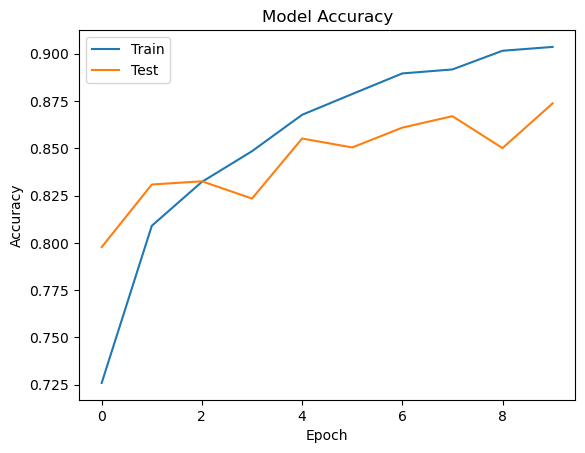

In [9]:
#print the accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [10]:
#Lets see the other evaluation metrics 

from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

print(classification_report(y_test, y_pred))

93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       189
           1       0.67      0.77      0.72        77
           2       0.83      0.88      0.86        51
           3       0.96      1.00      0.98        22
           4       0.96      1.00      0.98       108
           5       1.00      0.94      0.97        77
           6       0.90      0.85      0.87      1212
           7       0.85      0.90      0.88      1181
           8       0.59      0.81      0.68        16
           9       0.88      0.76      0.81        29

    accuracy                           0.87      2962
   macro avg       0.85      0.87      0.86      2962
weighted avg       0.88      0.87      0.87      2962



In [15]:
# Sauvegarder le modèle dans le format recommandé par Keras
model.save('model_cancer.keras')  # Utilisation du format natif de Keras avec l'extension .keras
